In [1]:
from differential_eq import Linear, Mendelsohn, Gompertz, Logistic, Montroll, ExponentialAddition, LinearLimited, Exponential
import matplotlib.pyplot as plt
from math import exp
from random import random

## Testing ODE solvers for different models

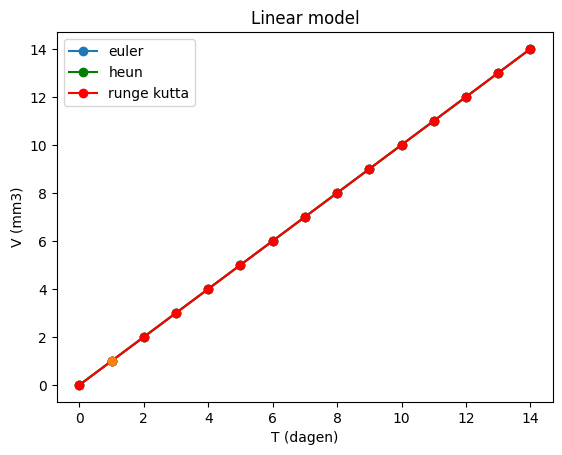

In [2]:
linear = Linear(solver='runge-kutta', fitter="direct", solution='BIC')
params = {'c':1.00, 'y0':0.00}
ts = [i for i in range(15)]
ys = [linear.euler_method(t, 10, params) for t in ts]
ys_1 = [linear.heun_method(t, 10, params) for t in ts]
ys_2 = [linear.runge_kutta(t, 10, params) for t in ts]


plt.plot(ts, ys, '-o', label="euler")
plt.plot(ts, ys_1, '-og', label="heun")
plt.plot(ts, ys_2, "-or", label="runge kutta")
plt.xlabel("T (dagen)")
plt.ylabel("V (mm3)")
plt.plot(1.0, linear.heun_method(1.0, 10, params), "o")
plt.title("Linear model")
plt.legend()
plt.show()

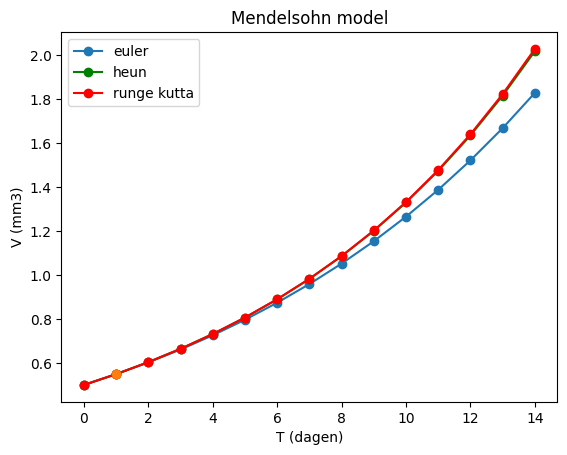

In [3]:
mendelsohn = Mendelsohn(solver="runge-kutta", fitter="direct", solution="BIC")
params = {'c':0.10, 'y0':0.50, 'd':1.10}
ts = [i for i in range(15)]
ys = [mendelsohn.euler_method(t, 10, params) for t in ts]
ys_1 = [mendelsohn.heun_method(t, 10, params) for t in ts]
ys_2 = [mendelsohn.runge_kutta(t, 10, params) for t in ts]

plt.plot(ts, ys, '-o', label="euler")
plt.plot(ts, ys_1, '-og', label="heun")
plt.plot(ts, ys_2, "-or", label="runge kutta")
plt.xlabel("T (dagen)")
plt.ylabel("V (mm3)")
plt.plot(1.0, mendelsohn.heun_method(1.0, 10, params), "o")
plt.title("Mendelsohn model")
plt.legend()
plt.show()

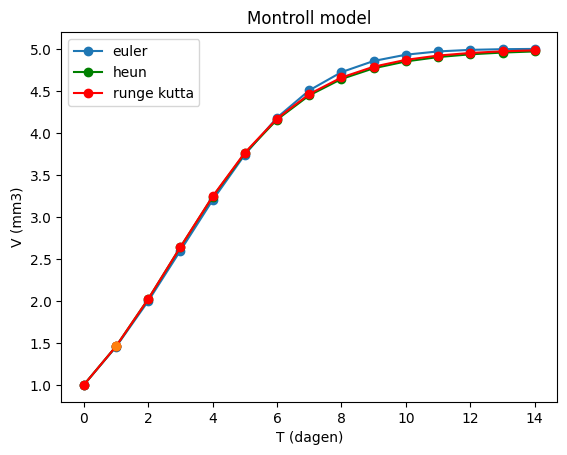

In [4]:
montroll = Montroll(solver="runge-kutta", fitter="direct", solution="BIC")
params = {'c':0.10, 'y0':1.00, "V_max^d":5.00, 'd':1.00}
ts = [i for i in range(15)]
ys = [montroll.euler_method(t, 10, params) for t in ts]
ys_1 = [montroll.heun_method(t, 10, params) for t in ts]
ys_2 = [montroll.runge_kutta(t, 10, params) for t in ts]


plt.plot(ts, ys, '-o', label="euler")
plt.plot(ts, ys_1, '-og', label="heun")
plt.plot(ts, ys_2, "-or", label="runge kutta")
plt.xlabel("T (dagen)")
plt.ylabel("V (mm3)")
plt.plot(1.0, montroll.heun_method(1.0, 10, params), "o")
plt.title("Montroll model")
plt.legend()
plt.show()

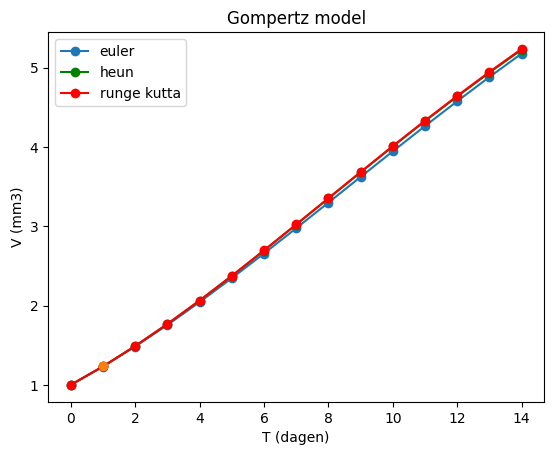

In [5]:
gompertz = Gompertz(solver="runge-kutta", fitter="direct", solution="BIC")
params = {'c':0.10, 'y0':1.00, "V_max":9.00}
ts = [i for i in range(15)]
ys = [gompertz.euler_method(t, 10, params) for t in ts]
ys_1 = [gompertz.heun_method(t, 10, params) for t in ts]
ys_2 = [gompertz.runge_kutta(t, 10, params) for t in ts]


plt.plot(ts, ys, '-o', label="euler")
plt.plot(ts, ys_1, '-og', label="heun")
plt.plot(ts, ys_2, "-or", label="runge kutta")
plt.xlabel("T (dagen)")
plt.ylabel("V (mm3)")
plt.plot(1.0, gompertz.heun_method(1.0, 10, params), "o")
plt.title("Gompertz model")
plt.legend()
plt.show()

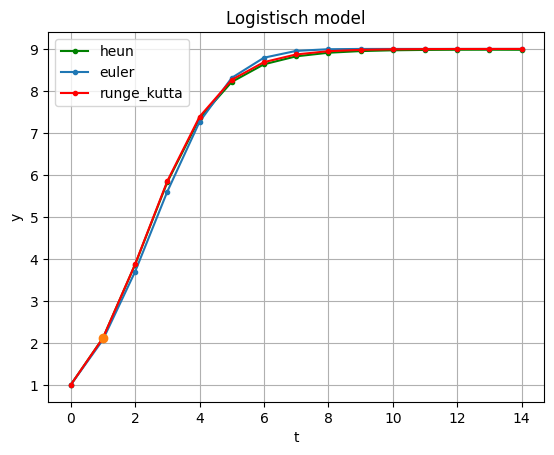

In [6]:
logistic = Logistic(solver="runge-kutta", fitter="direct", solution="BIC")
params = {'c':0.10, 'y0':1.00, 'V_max':9.00}
ts = [i for i in range(15)]
ys = [logistic.heun_method(t, 10, params) for t in ts]
ys_1 = [logistic.euler_method(t, 10, params) for t in ts]
ys_2 = [logistic.runge_kutta(t, 10, params) for t in ts]

plt.plot(ts, ys, "g.-", label="heun")
plt.plot(ts, ys_1, ".-", label="euler")
plt.plot(ts, ys_2, "r.-", label="runge_kutta")
plt.xlabel("t")
plt.ylabel("y")
plt.grid()
plt.plot(1.0, logistic.heun_method(1.0, 10, params), "o")
plt.title("Logistisch model")
plt.legend()

## Fitting test

### Testing fitting on unknown dataset and model

In [7]:
ts = [
     3.46,  4.58,  5.67,  6.64,  7.63,  8.41,  9.32, 10.27, 11.19,
    12.39, 13.42, 15.19, 16.24, 17.23, 18.18, 19.29, 21.23, 21.99,
    24.33, 25.58, 26.43, 27.44, 28.43, 30.49, 31.34, 32.34, 33.00,
    35.20, 36.34, 37.29, 38.50, 39.67, 41.37, 42.58, 45.39, 46.38,
    48.29, 49.24, 50.19, 51.14, 52.10, 54.00, 56.33, 57.33, 59.38,
]
Vdata = [
    0.0158, 0.0264, 0.0326, 0.0445, 0.0646, 0.0933, 0.1454, 0.2183, 0.2842,
    0.4977, 0.6033, 0.8441, 1.2163, 1.4470, 2.3298, 2.5342, 3.0064, 3.4044,
    3.2046, 4.5241, 4.3459, 5.1374, 5.5376, 4.8946, 5.0660, 6.1494, 6.8548,
    5.9668, 6.6945, 6.6395, 6.8971, 7.2966, 7.2268, 6.8815, 8.0993, 7.2112,
    7.0694, 7.4971, 6.9974, 6.7219, 7.0523, 7.1095, 7.0694, 8.0562, 7.2268, 
]

tmin, tmax = min(ts), max(ts)
tdata = [2.0 * (t - tmin) / (tmax - tmin) - 1.0 for t in ts]

Vmax = max(Vdata)
Vdata = [V / Vmax for V in Vdata]
print(tdata)
print(Vdata)

[-1.0, -0.9599427753934192, -0.920958512160229, -0.8862660944206009, -0.8508583690987125, -0.822961373390558, -0.790414878397711, -0.7564377682403434, -0.7235336194563662, -0.6806151645207439, -0.6437768240343347, -0.5804721030042919, -0.5429184549356224, -0.507510729613734, -0.4735336194563663, -0.4338340486409157, -0.36444921316165957, -0.3372675250357655, -0.25357653791130197, -0.2088698140200287, -0.17846924177396284, -0.14234620886981408, -0.10693848354792568, -0.03326180257510736, -0.0028612303290415086, 0.03290414878397718, 0.05650929899856938, 0.13519313304721026, 0.1759656652360515, 0.2099427753934191, 0.2532188841201717, 0.29506437768240334, 0.3558655221745348, 0.3991416309012874, 0.4996423462088697, 0.5350500715307582, 0.6033619456366237, 0.6373390557939913, 0.6713161659513589, 0.7052932761087267, 0.7396280400572246, 0.8075822603719598, 0.890915593705293, 0.9266809728183116, 1.0]
[0.0019507858703838607, 0.0032595409479831594, 0.004025039200918598, 0.005494301976714037, 0.007

In [8]:
# Change model when experimenting
model = ExponentialAddition(solver="runge-kutta", fitter="direct", solution='BIC')
model.fit(tdata, Vdata)
params = model.params
print(params)

{'c': -1.3499157323834383, 'y0': 0.659742685838215, 'd': 1.4677725184269526}


In [9]:
print(model.quality(tdata, Vdata))
parameters = model.params

-245.33594942150188


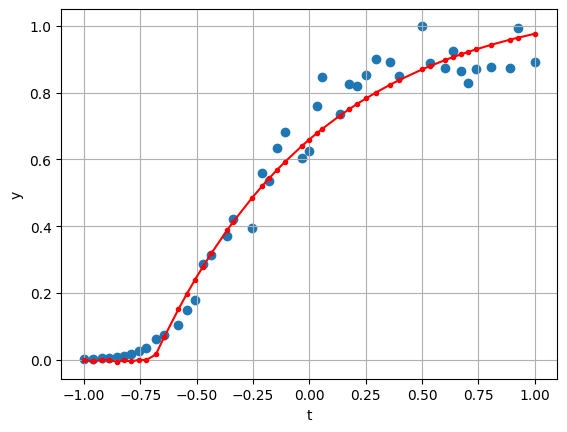

In [10]:
ys = [model.runge_kutta(t, None, parameters) for t in tdata]
plt.plot(tdata, ys, "r.-", label="runge_kutta")
plt.scatter(tdata, Vdata)
plt.xlabel("t")
plt.ylabel("y")
plt.grid()
plt.show()

### Testing fitting on before hand chosen formula and model

In [11]:
from math import exp
from random import random

data_ts = [random() for _ in range(20)]
data_ys = [exp(data_t) - 1.0 for data_t in data_ts]

exponential_add = ExponentialAddition(solver="runge-kutta", fitter="direct", solution="BIC")
params = {'c': 0.00, 'y0':0.00, 'V_max':0.00}
exponential_add.fit(data_ts, data_ys)
ts = [i/10 for i in range(16)]
ys = [exponential_add.runge_kutta(t) for t in ts]

In [12]:
print(exponential_add)
saved = exponential_add.params
print(exponential_add.mean_squared_error(data_ts, data_ys, saved))

 1.00 ⋅ V +  1.00
5.213048659190113e-12


In [13]:
print(exponential_add.quality(ts, ys))

-inf


c:\Development\differential\differential_eq.py:264: RuntimeWarning: divide by zero encountered in log
  return n * np.log(mse) + k * np.log(n)


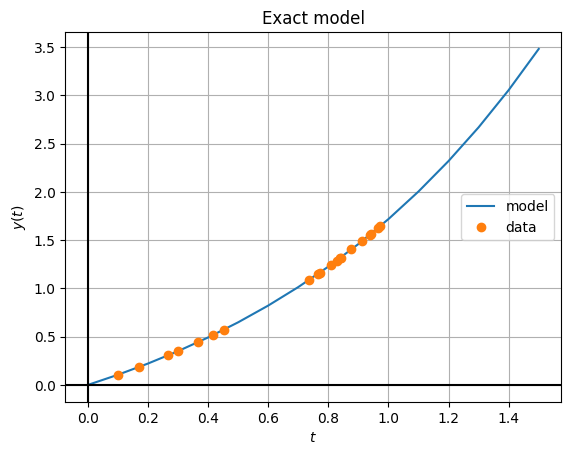

In [15]:
plt.plot(ts, ys, '-', label='model')
plt.plot(data_ts, data_ys, 'o', label='data')
plt.axhline(0.0, color='k'); plt.axvline(0.0, color='k')
plt.grid(True); plt.legend()
plt.xlabel('$t$'); plt.ylabel('$y(t)$')
plt.title("Exact model")
plt.show()